28/02/2024

Author: Camilo Jara Do Nascimento

https://github.com/cjotade/Research_Methods_for_AI/blob/main/seminar_6/vis.ipynb

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(0)

## Generate data

In [ ]:
# Example data (imitating the 'babynames' dataset)
years = np.arange(1880, 2016)
names = ["Mary", "Emma", "Ida", "Ashley", "Amanda", "Jessica", "Patricia", "Linda", "Deborah", "Dorothy", "Betty", "Helen"]

# Function to generate a popularity trend for a name
def generate_trend(years, peak_year, peak_value, spread):
    trend = peak_value * np.exp(-0.5 * ((years - peak_year) / spread) ** 2)
    # Add a small random noise to each point
    noise = np.random.normal(0, peak_value * 0.02, len(years))  # 2% of peak_value as noise
    return trend + noise

# Generate data with more realistic trends
data = pd.DataFrame({
    'year': np.tile(years, len(names)),
    'name': np.repeat(names, len(years)),
    'n': np.concatenate([
        generate_trend(years, 1900, 80000, 20),  # Mary
        generate_trend(years, 1885, 50000, 15),  # Emma
        generate_trend(years, 1890, 30000, 10),  # Ida
        generate_trend(years, 1990, 70000, 15),  # Ashley
        generate_trend(years, 1980, 60000, 20),  # Amanda
        generate_trend(years, 1995, 90000, 25),  # Jessica
        generate_trend(years, 1950, 40000, 20),  # Patricia
        generate_trend(years, 1960, 50000, 25),  # Linda
        generate_trend(years, 1955, 30000, 15),  # Deborah
        generate_trend(years, 1920, 20000, 10),  # Dorothy
        generate_trend(years, 1930, 25000, 15),  # Betty
        generate_trend(years, 1910, 35000, 20)   # Helen
    ])
})

## Useful Plots

### The Spaghetti plot

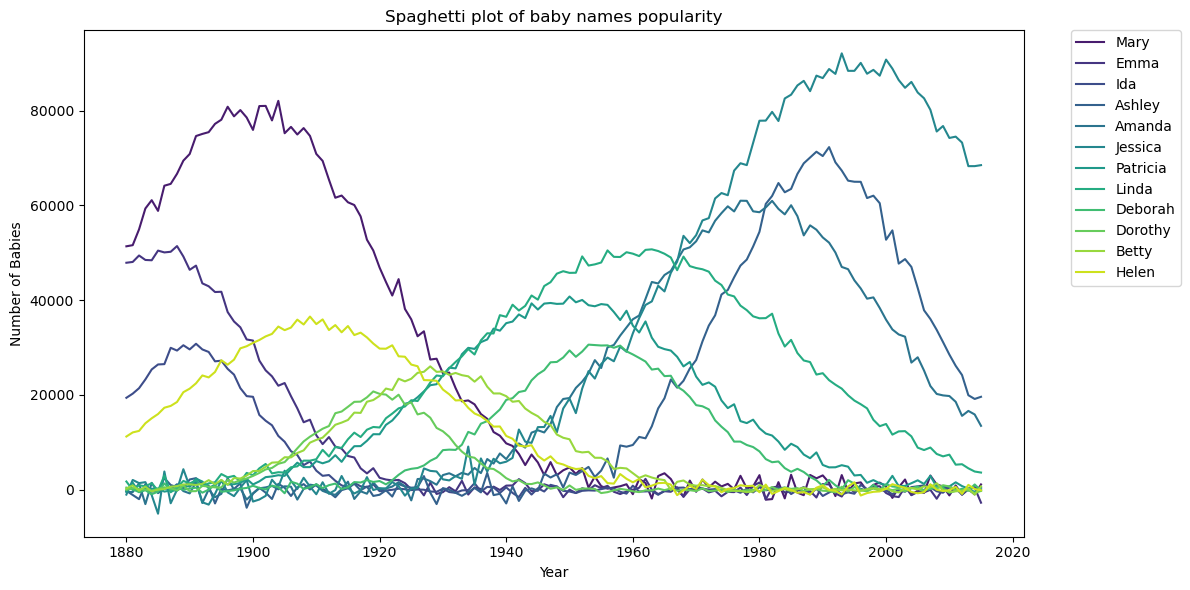

In [2]:
# Basic spaghetti plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='n', hue='name', legend='full', palette='viridis')
plt.title("Spaghetti plot of baby names popularity")
plt.xlabel("Year")
plt.ylabel("Number of Babies")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

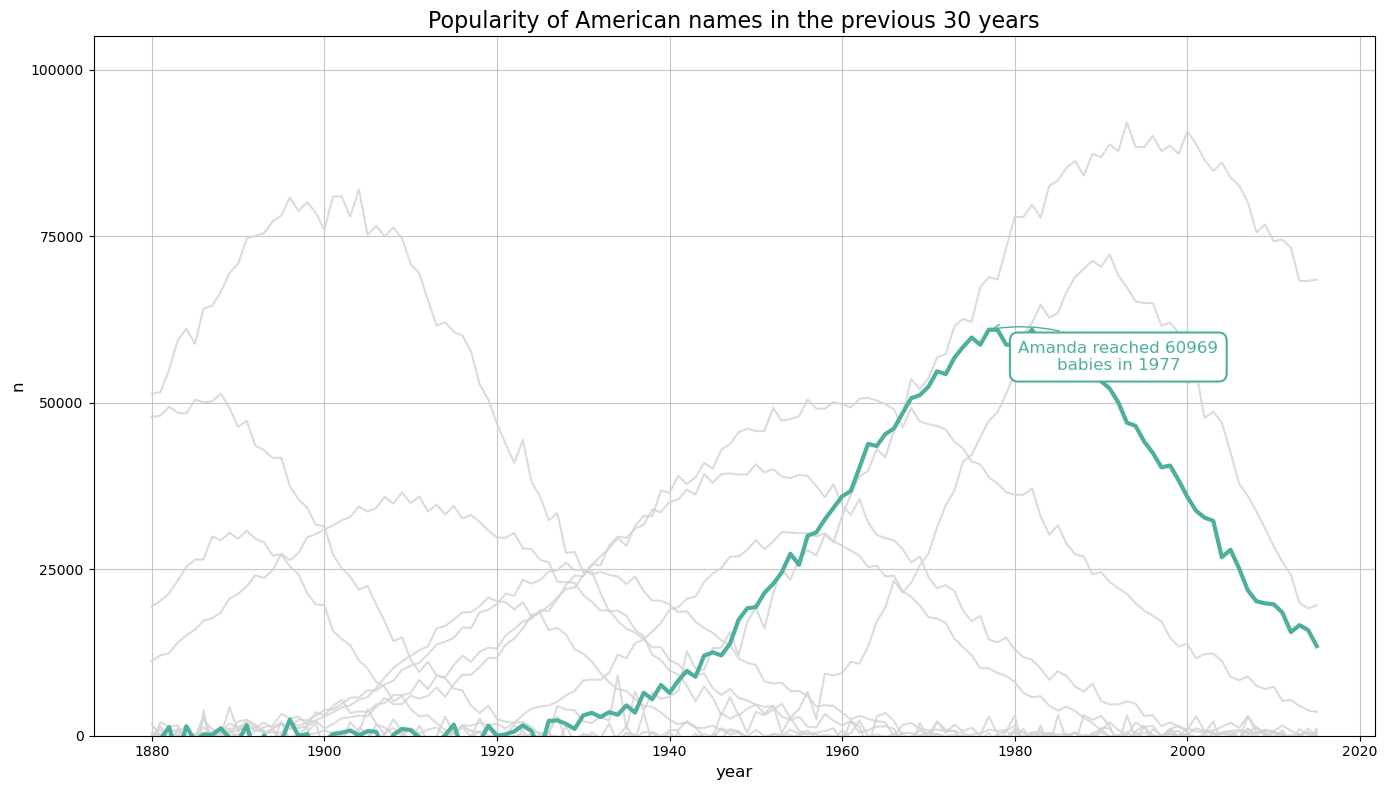

In [ ]:
plot_name = "Amanda"

# Create the plot
plt.figure(figsize=(14, 8))
# Plot all names in light gray first
for name in names:
    if name != plot_name:
        subset = data[data['name'] == name]
        plt.plot(subset['year'], subset['n'], color='lightgray', alpha=0.8)
# Highlight selected name in teal
highlight_data = data[data['name'] == plot_name]
plt.plot(highlight_data['year'], highlight_data['n'], color='#4daf9c', linewidth=3)

# /////////////////////////////////////////////////////////
#! Annotation (optional)
# Get maximum value and its year for the highlighted name
max_idx = highlight_data['n'].idxmax()
max_year = highlight_data.loc[max_idx, 'year']
max_value = int(highlight_data.loc[max_idx, 'n'])
# Calculate annotation position (slightly offset from the maximum)
annotation_x = max_year + 15  # 15 years to the right
annotation_y = max_value * 0.9  # 90% of the max height
plt.annotate(f"{plot_name} reached {max_value}\nbabies in {int(max_year)}",
            xy=(max_year, max_value),  # Arrow points to max value
            xytext=(annotation_x, annotation_y),  # Text position
            bbox=dict(boxstyle="round,pad=0.5", fc="#ffffff", ec="#4daf9c", lw=1.5, alpha=1),
            color="#4daf9c",
            fontsize=12,
            ha='center',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2", color="#4daf9c"))
# /////////////////////////////////////////////////////////

# Set figure configurations: title, labels, grid, lims, ticks.
plt.title("Popularity of American names in the previous 30 years", fontsize=16)
plt.xlabel("year", fontsize=12)
plt.ylabel("n", fontsize=12)
plt.grid(alpha=0.7)
plt.ylim(0, 105000)
plt.yticks([0, 25000, 50000, 75000, 100000])
plt.tight_layout()
plt.show()

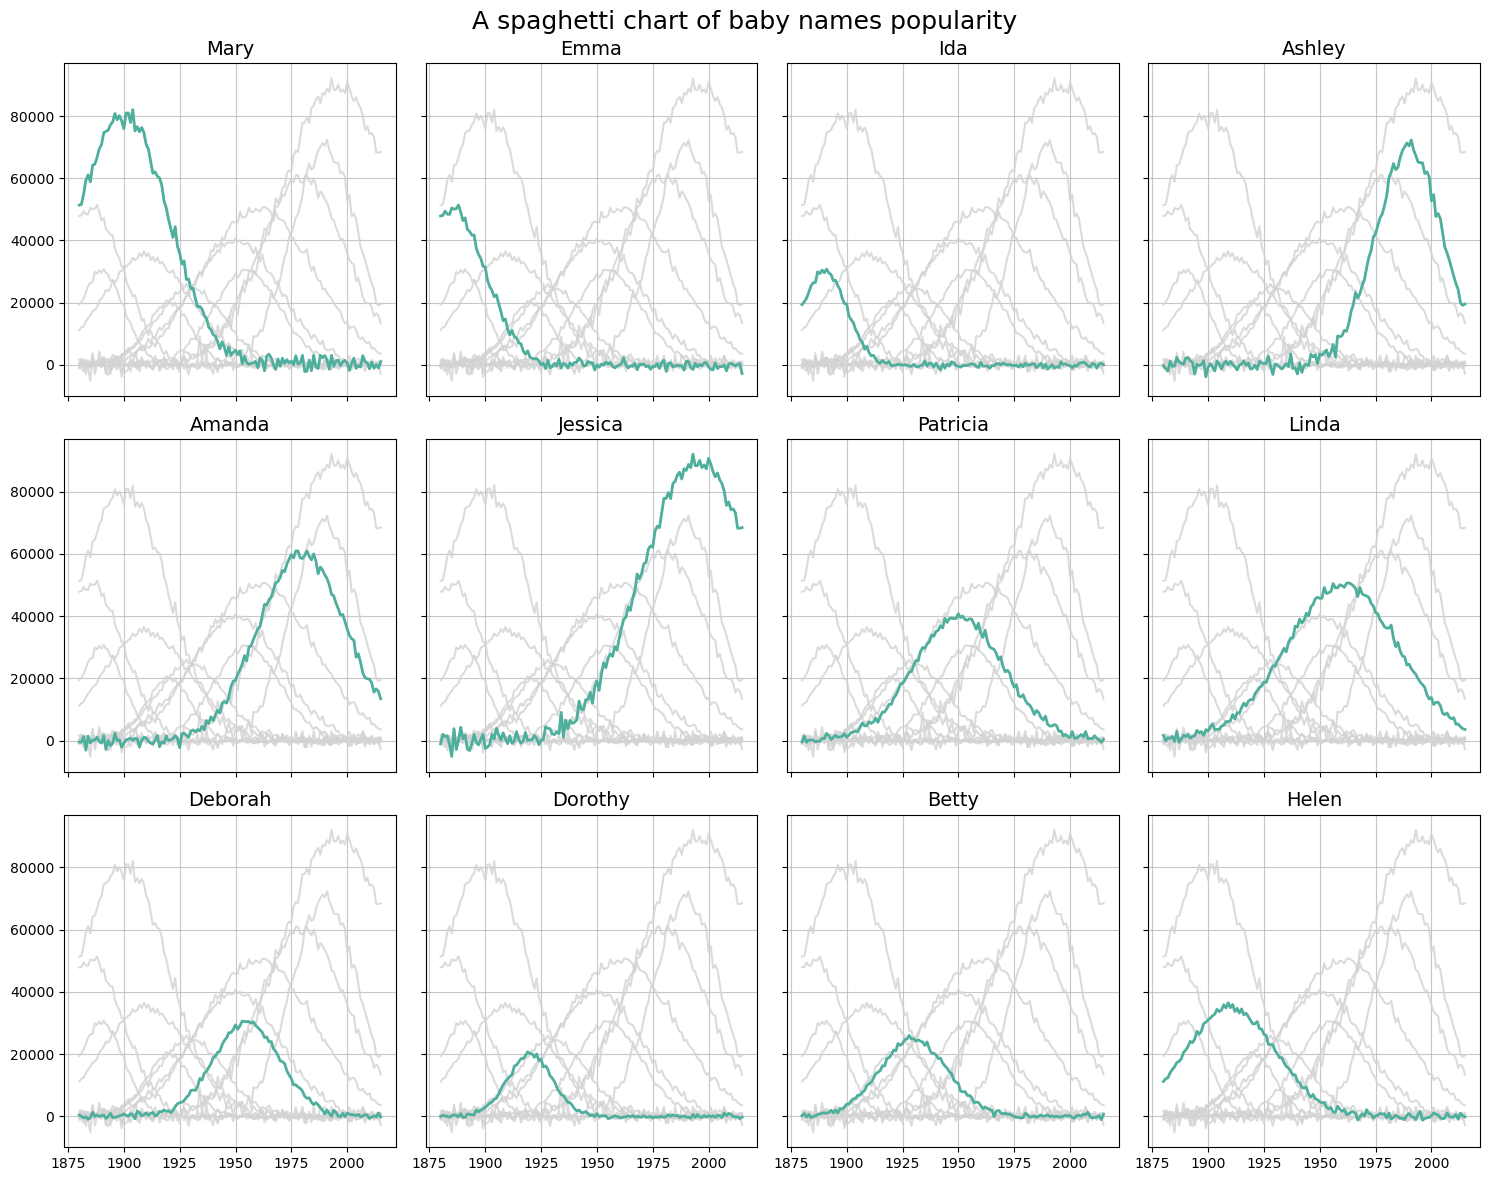

In [59]:
# Create a grid of subplots with 3 rows and 4 columns
fig, axes = plt.subplots(3, 4, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Plot each name in its own subplot
for i, name in enumerate(names):
    ax = axes[i]
    
    # Plot all names in light gray as background
    for other_name in names:
        other_data = data[data['name'] == other_name]
        ax.plot(other_data['year'], other_data['n'], color='lightgray', alpha=0.8)
    
    # Highlight the current name in teal
    highlight_data = data[data['name'] == name]
    ax.plot(highlight_data['year'], highlight_data['n'], color='#4daf9c', linewidth=2)
    
    # Set subplot configurations and customize appearance
    ax.set_title(name, fontsize=14)
    ax.grid(alpha=0.7)

# Set main title and fig configurations
fig.suptitle("A spaghetti chart of baby names popularity", fontsize=18, y=0.98)
fig.tight_layout()
plt.show()